In [1]:
!pip install -r requirements.txt

## Disclaimer on Use of AI Assistance

Parts of this project were developed with the assistance of OpenAI’s ChatGPT (GPT-5) and Google Gemini.  
AI was used to:
- Brainstorm approaches for feature engineering, data aggregation, and exploratory analysis.  
- Generate example Python/Markdown code snippets for model training, evaluation, and visualization.  
- Provide structured guidance on how to interpret climate–soil–crop interactions.  

All outputs were **reviewed, adapted, and validated** by the project authors.  

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df_crop = pd.read_csv("crop_yield_1980-2022.csv")
df_crop.describe()

,Unnamed: 0,Year,Week Ending,State ANSI,Ag District Code,County ANSI,Zip Code,Region,watershed_code,Watershed,Value,CV (%),YIELD_LBS_PER_ACRE
count,18105.000000,18105.000000,0.0,18105.0,18105.000000,17359.000000,0.0,0.0,18105.0,0.0,18105.000000,783.000000,18105.000000
mean,11210.306269,1997.535101,NaN,37.0,60.876222,101.032721,NaN,NaN,0.0,NaN,280.789312,6.426309,4152.781221
std,6885.892442,11.670559,NaN,0.0,22.823551,56.640790,NaN,NaN,0.0,NaN,718.039079,3.053433,6467.701653
min,403.000000,1980.000000,NaN,37.0,10.000000,1.000000,NaN,NaN,0.0,NaN,0.000000,1.200000,0.000000
25%,5081.000000,1988.000000,NaN,37.0,40.000000,53.000000,NaN,NaN,0.0,NaN,32.000000,4.250000,1680.000000
50%,10643.000000,1996.000000,NaN,37.0,70.000000,101.000000,NaN,NaN,0.0,NaN,47.000000,5.800000,2500.000000
75%,17064.000000,2006.000000,NaN,37.0,80.000000,151.000000,NaN,NaN,0.0,NaN,94.300000,8.000000,3864.000000
max,24061.000000,2022.000000,NaN,37.0,99.000000,199.000000,NaN,NaN,0.0,NaN,5000.000000,21.200000,68000.000000


In [4]:
df_climate = pd.read_csv("NC_County_Weather_1980-2022_Monthly.csv")
df_climate.describe()

,Elevation (ft),ppt (inches),tmin (degrees F),tmean (degrees F),tmax (degrees F),tdmean (degrees F),vpdmin (hPa),vpdmax (hPa)
count,51600.000000,51600.000000,51600.000000,51600.000000,51600.000000,51600.000000,51600.000000,51600.000000
mean,803.520000,4.163818,48.067004,59.278795,70.492157,48.633595,0.737417,14.900561
std,977.094515,2.383476,14.382407,13.980553,13.759694,14.793254,0.518095,6.331315
min,3.000000,0.000000,11.400000,22.700000,30.400000,13.300000,0.000000,1.850000
25%,67.250000,2.520000,35.500000,47.100000,58.700000,35.800000,0.380000,9.400000
50%,470.500000,3.800000,47.400000,59.500000,71.600000,48.100000,0.660000,14.420000
75%,996.000000,5.350000,61.500000,72.200000,82.800000,62.800000,1.000000,19.380000
max,4039.000000,32.220000,75.300000,84.800000,98.900000,77.300000,4.530000,43.060000


In [5]:
df_soil = pd.read_csv("data/soil.csv")
df_soil.head()

,County,avg_aws0_150,avg_aws0_100,avg_soc0_30,avg_soc0_150,avg_rootznaws,avg_rootznemc,avg_tk0_30a,avg_tk0_100a,avg_tk0_30s,avg_tk0_100s,avg_pctearthmc,avg_musumcpct,avg_droughty,avg_nccpi3all
0,ALAMANCE,197.886178,132.744924,2284.300661,4478.573429,199.054139,143.529062,28.658990,95.529964,28.641359,95.016608,88.437750,99.981044,0.012182,0.617807
1,ALEXANDER,148.530070,106.243008,2185.968114,4554.240898,170.360588,132.036717,25.714974,85.403828,25.652032,80.545579,85.280096,87.689334,0.171668,0.472278
2,ALLEGHANY,151.029962,113.491554,4754.367178,8164.262593,179.418686,136.743187,24.741970,82.473234,24.683400,80.625716,80.881950,84.097583,0.158022,0.332558
3,ANSON,143.452231,108.285218,1563.091771,3096.829388,164.731548,115.653281,25.375514,83.913868,25.372261,75.855902,83.663832,86.419433,0.373429,0.514215
4,ASHE,157.828140,117.511114,6337.197200,10773.715178,190.235754,142.563596,24.694098,82.313661,24.688331,82.194718,81.741055,82.984848,0.144586,0.251879


# 🌦 Climate Indicators – Brainstorming Notes

Understanding these climate variables helps us form hypotheses about how they might affect crop growth, resilience, and failure events. Below are potential relationships to investigate.

---

## Elevation (ft)
- Higher elevation can influence **temperature** (generally cooler) and **precipitation patterns**.  
- Crops at higher elevations may experience **shorter growing seasons**.  
- Potential impact: May favor cold-tolerant crops or hinder heat-loving crops.

---

## Precipitation – ppt (inches)
- Direct link to **soil moisture availability**.  
- Too little → **drought stress** and crop failure.  
- Too much → **flooding, waterlogging, nutrient leaching**.  
- Crops differ in water requirements (e.g., rice vs. wheat).

---

## Minimum Temperature – tmin (°F)
- Critical for **frost events**.  
- Affects **germination and survival** of young plants.  
- Low tmin → cold stress → possible crop failure for sensitive crops.  
- Can help identify years with frost-related losses.

---

## Mean Temperature – tmean (°F)
- Proxy for **overall growing season climate**.  
- Crops have **optimal temperature ranges**; deviations can reduce yields.  
- Useful for modeling **long-term yield trends** under climate change.

---

## Maximum Temperature – tmax (°F)
- High daytime temps can cause **heat stress**, reduce pollination success, and accelerate water loss.  
- Especially important for **flowering and grain-filling stages**.  
- Crop failure events may align with extreme tmax years.

---

## Dew Point Mean – tdmean (°F)
- Relates to **atmospheric moisture** and **relative humidity**.  
- Higher dew point → more humid conditions → potential for **disease pressure** (fungal, mold).  
- Low dew point → drier air → increased **evapotranspiration** and drought stress.

---

## Vapor Pressure Deficit – vpdmin (hPa) and vpdmax (hPa)
- **VPD = difference between air’s moisture-holding capacity and actual moisture content.**  
- High VPD → more water pulled from plants → stress if soil water is limited.  
- Low VPD → more humid, less plant stress, but possibly more disease risk.  
- **vpdmin**: usually nighttime or cooler periods.  
- **vpdmax**: usually daytime or hottest periods.  
- Useful for quantifying **plant stress intensity** in combination with temperature and precipitation.

---

# 💡 Hypotheses to Explore
1. Do extreme **tmin** years align with observed crop failure events?  
2. Is there a yield threshold where **ppt** (too high/too low) reduces production significantly?  
3. Are years with high **tmax + vpdmax** associated with lower yields for heat-sensitive crops?  
4. Does **elevation** correlate with crop type suitability (e.g., certain crops concentrated in higher/lower counties)?  

---


# 🌱 Soil Indicators – Brainstorming Notes

Soil properties strongly influence water availability, root development, and nutrient cycling. These features can interact with climate variables (rainfall, temperature, VPD) to amplify or mitigate stress on crops.

---

## Available Water Storage (aws…)
- Depth-specific water holding capacity (in mm).  
- Examples: `aws0_5`, `aws20_50`, `aws100_150`.  
- Higher AWS → better drought resistance (soil retains more water).  
- Low AWS → crops rely heavily on irrigation or rainfall.  
- Summed values (`aws0_100`, `aws0_150`, `aws0_999`) represent total soil profile capacity.  
- **Hypothesis:** Regions with higher AWS support higher yields under variable rainfall.

---

## Soil Texture (tk…a / tk…s)
- Likely represents **texture fractions** (sand, silt, clay percentages) at various depths.  
- Affects **drainage, water retention, aeration**.  
- Sandy → drains fast, low fertility.  
- Clay → holds water, but risk of waterlogging.  
- Loam → balanced, generally optimal for crops.  
- Aggregated depths (`tk0_30a`, `tk0_100a`, etc.) capture bulk properties across root zones.

---

## Soil Organic Carbon (soc…)
- Depth-specific organic carbon content.  
- Higher SOC → better nutrient availability, improved water holding, enhanced microbial activity.  
- Declines with depth (most SOC in top layers).  
- Strong driver of long-term soil fertility.  
- **Hypothesis:** Higher SOC areas correlate with more stable yields, especially under stress.

---

## NCCPI Scores (`nccpi3corn`, `nccpi3soy`, `nccpi3cot`, `nccpi3sg`, `nccpi3all`)
- National Commodity Crop Productivity Index.  
- Precomputed USDA indices for relative productivity of specific crops.  
- Useful as a **baseline soil suitability feature**.  
- Can validate whether your model aligns with known soil-crop relationships.  

---

## Root Zone Depth & Properties
- `rootznemc`: Effective rooting depth (cm).  
- `rootznaws`: Water storage capacity within root zone.  
- Shallow roots → crops more sensitive to drought.  
- Deep roots → crops can tap subsoil moisture.  
- **Hypothesis:** Counties with deeper root zones sustain crops better during dry years.

---

## Drought Vulnerability
- `droughty`: Soil drought vulnerability classification.  
- Important for identifying areas prone to crop failure under low rainfall years.  
- **Hypothesis:** Align historical crop failures with high `droughty` soils.

---

## Other Indicators
- `musumcpcta`, `musumcpcts`, `musumcpct`: Likely map unit % composition (area proportion of soil type).  
- `pctearthmc`: % of earth material in soil (vs. rock, etc.).  
- `pwsl1pomu`: Possibly land capability / slope or erodibility measure (needs confirming from metadata).  
- `mukey`: Unique soil map unit identifier (join key for gSSURGO).  

---

# 💡 Hypotheses to Explore
1. High `aws0_100` and `soc0_30` → crops maintain yields in dry years.  
2. Sandy soils (low AWS, low SOC) → more crop failures under drought.  
3. NCCPI indices should **correlate strongly with observed yields**; discrepancies may highlight climate-driven stresses.  
4. Root zone metrics may explain why some counties sustain crops better under heat + VPD extremes.  
5. Historical failures may align with high `droughty` ratings + low SOC.  

---


# 🌱 Climate–Soil–Crop System Notes

## 1. Climate–Soil Interactions

### Precipitation × AWS/SOC
- Rainfall effectiveness depends on soil water storage. High `aws0_100` and `soc0_30` buffer dry years by storing more available water.  
- On sandy soils (low AWS, low SOC), rainfall runs through quickly → higher drought risk → stronger yield reductions for shallow-rooted crops like peanuts.  

### Temperature Extremes (tmin, tmax) × Root Zone
- Low `tmin` events damage germination for cotton and peanuts, which are cold-sensitive. Wheat tolerates frost better.  
- High `tmax + vpdmax` stresses corn and soybeans at pollination/grain-fill unless deep root zones (`rootznaws`, `rootznemc`) provide moisture.  

### Dew Point / VPD × Soil Texture
- High VPD accelerates evapotranspiration. In sandy soils with low AWS, stress is magnified.  
- High dew point creates humid microclimates; coupled with high SOC soils, this can increase disease pressure (soybean rust, corn leaf blight, peanut leaf spot).  

### Elevation × Tmin / Season Length
- Higher elevation lowers mean temp and shortens frost-free season.  
- Wheat benefits (cold tolerance), cotton and peanuts lose yield (require heat units).  

---

## 2. Crop-Specific Sensitivities

### Corn
- High water demand, shallow roots. Yield stability strongly tied to AWS + ppt during silking.  
- Heat stress at pollination (`tmax + vpdmax`) causes kernel abortion.  
- `NCCPIcorn` should correlate closely unless extreme climate years distort outcomes.  

### Cotton
- Deep-rooted, more drought-tolerant. Still sensitive to low `tmin` at establishment and excessive ppt (boll rot, disease).  
- Performs better in sandy soils with drainage but needs SOC to maintain fertility.  

### Peanuts
- Require warm soils. Highly sensitive to frost (`tmin`).  
- Prefer sandy soils but vulnerable to drought unless irrigation or subsoil moisture present.  

### Soybeans
- Moderate water need. Stress at flowering/pod-fill from high `vpdmax` or `tmax` cuts yield.  
- SOC-rich soils improve nodulation and nitrogen fixation.  
- Frost-sensitive at emergence.  

### Wheat
- Cold-tolerant, suited to higher elevations and cooler temps.  
- Less sensitive to ppt deficits due to deep rooting in some varieties.  
- Excess ppt near harvest reduces quality (sprouting, disease).  

---

## 3. Yield Determinants (lbs/acre)
- **Moisture regime** (`ppt × aws × soc × rootznaws`) is the central lever. Explains why some counties sustain yields through drought.  
- **Thermal stress** (`tmin` frost events, `tmax` heat waves) often explains catastrophic yield loss.  
- **Disease pressure** (dew point, humidity, SOC-rich soils) interacts with management; yield penalties often localized.  
- **NCCPI indices** provide a baseline soil potential, but deviations usually flag climate shocks or management gaps.  

---

## 4. Hypothesis Mapping
- High `aws0_100 + soc0_30` = yield stability under drought → supported, especially in corn/soybean counties.  
- Sandy soils with low AWS, SOC = more crop failures under drought → strongest for peanuts, then corn.  
- NCCPI vs observed yield → soil explains baseline, climate explains deviations.  
- Root zone depth / `rootznaws` → explains resilience under heat + high VPD, especially cotton and wheat.  
- Historical failures align with high `droughty` + low SOC → consistent with county loss records.  

### Climate-driven hypotheses:
- Low `tmin` → frost damage in cotton/peanuts.  
- Extreme `ppt` → losses from drought/flood depending on AWS.  
- High `tmax + vpdmax` → reduced yields in heat-sensitive crops (corn, soy).  
- Elevation → crop distribution patterns (wheat up, cotton/peanuts down).  


# 🌾 Variable × Crop Yield Impact Matrix

Legend:  
- `+` = generally positive for yield  
- `−` = generally negative for yield  
- `±` = mixed effect depending on timing/level  
- `0` = little to no consistent effect  

| Variable            | Corn | Cotton | Peanuts | Soybeans | Wheat |
|---------------------|------|--------|---------|----------|-------|
| **Elevation**       | − (short season) | − (cool stress) | − (cool stress) | ± (depends on frost) | + (cold-tolerant) |
| **ppt (precip.)**   | + (needed at silking) | ± (excess causes rot) | + (needs steady water) | + (flower/pod fill) | ± (too much = lodging/disease) |
| **tmin (frost risk)** | − (young plants) | − (very sensitive) | − (very sensitive) | − (sensitive at emergence) | + (tolerant) |
| **tmean**           | ± (optimum 68–77°F) | ± (needs warmth) | ± (warmth needed) | ± (mid-range best) | ± (cool preferred) |
| **tmax (heat stress)** | − (pollination loss) | − (boll abortion) | − (flowering stress) | − (pod-fill loss) | ± (some heat tolerance) |
| **tdmean (dew point)** | ± (disease pressure ↑ with humidity) | ± (boll rot risk) | ± (fungal disease risk) | ± (disease vs drought relief) | ± (rust risk) |
| **vpdmin**          | 0 (low stress at night) | 0 | 0 | 0 | 0 |
| **vpdmax**          | − (water stress ↑) | ± (tolerant if roots deep) | − (droughty sandy soils) | − (pod-fill stress) | ± (moderately tolerant) |
| **aws0_100 (water storage)** | + (buffers drought) | + (supports flowering) | + (prevents drought failure) | + (stabilizes yield) | + (supports grain fill) |
| **Soil texture**    | ± (loam best, sand droughty) | + (likes drainage) | + (requires sandy soils but risk in drought) | ± (loam preferred) | ± (loam/clay for moisture) |
| **SOC (0–30 cm)**   | + (fertility + water holding) | + (fertility, less water stress) | ± (helps water balance, but sandy preference) | + (nodulation support) | + (fertility + stability) |
| **NCCPI crop index** | + (strong baseline predictor) | + | + | + | + |
| **Root zone depth (rootznemc, rootznaws)** | + (deeper = stress buffer) | + | + (critical in sandy soils) | + | + |
| **Droughty soils**  | − (yield instability) | ± (tolerant but limited) | − (very vulnerable) | − (sensitive during flowering) | − (but less severe than corn/soy) |


# Master Data

## Yeild

In [6]:
df_crop.head()

,Unnamed: 0,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,...,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%),YIELD_LBS_PER_ACRE
0,403,SURVEY,2022,YEAR,NaN,COUNTY,NORTH CAROLINA,37,NaN,99,...,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,122.2,3.2,6843.2
1,404,SURVEY,2022,YEAR,NaN,COUNTY,NORTH CAROLINA,37,NaN,99,...,NaN,0,NaN,CORN,"CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE",TOTAL,NOT SPECIFIED,14.0,NaN,28000.0
2,405,SURVEY,2022,YEAR,NaN,COUNTY,NORTH CAROLINA,37,NaN,99,...,NaN,0,NaN,COTTON,"COTTON, UPLAND - YIELD, MEASURED IN LB / ACRE",TOTAL,NOT SPECIFIED,871.0,3.0,871.0
3,406,SURVEY,2022,YEAR,NaN,COUNTY,NORTH CAROLINA,37,NaN,99,...,NaN,0,NaN,PEANUTS,"PEANUTS - YIELD, MEASURED IN LB / ACRE",TOTAL,NOT SPECIFIED,4065.0,1.9,4065.0
4,407,SURVEY,2022,YEAR,NaN,COUNTY,NORTH CAROLINA,37,NaN,99,...,NaN,0,NaN,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,36.9,1.9,2214.0


In [7]:
df_crop = df_crop[['Year', 'Ag District', 'County', 'Commodity', 'YIELD_LBS_PER_ACRE']]

In [8]:
indices_to_drop = df_crop[df_crop['County'].isin(["OTHER (COMBINED) COUNTIES", "OTHER COUNTIES"])].index
df_crop.drop(indices_to_drop, inplace=True)

In [9]:
# Sum duplicate yields
df_crop = df_crop.groupby(['Year', 'County', 'Commodity'])['YIELD_LBS_PER_ACRE'].sum().reset_index()

In [10]:
df_crop.rename(columns={"YIELD_LBS_PER_ACRE":"Yield"}, inplace=True)

In [11]:
df_crop.to_csv('yield.csv', index=False)
df_crop.head()

,Year,County,Commodity,Yield
0,1980,ALAMANCE,CORN,3360.0
1,1980,ALAMANCE,SOYBEANS,1080.0
2,1980,ALAMANCE,WHEAT,3720.0
3,1980,ALEXANDER,CORN,2240.0
4,1980,ALEXANDER,SOYBEANS,720.0


In [12]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       12833 non-null  int64  
 1   County     12833 non-null  object 
 2   Commodity  12833 non-null  object 
 3   Yield      12833 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 401.2+ KB


## Climate

In [13]:
df_climate.head()

,Name,Elevation (ft),Date,ppt (inches),tmin (degrees F),tmean (degrees F),tmax (degrees F),tdmean (degrees F),vpdmin (hPa),vpdmax (hPa)
0,ALAMANCE,584,1980-01,4.18,30.6,39.6,48.7,30.0,0.74,5.94
1,ALAMANCE,584,1980-02,1.67,24.2,36.5,48.9,22.8,0.68,7.80
2,ALAMANCE,584,1980-03,5.82,34.9,46.0,57.1,32.6,1.14,9.38
3,ALAMANCE,584,1980-04,2.70,46.6,60.1,73.6,44.0,1.52,18.87
4,ALAMANCE,584,1980-05,3.56,54.8,67.7,80.6,54.3,1.24,20.91


In [14]:
df_climate.rename(columns={"Name":"County", "Elevation (ft)":"Elevation", "ppt (inches)":"ppt", "tmin (degrees F)":"tmin", "tmean (degrees F)":"tmean", 
                           "tmax (degrees F)":"tmax", "tdmean (degrees F)":"tdmean", "vpdmin (hPa)":"vpdmin", "vpdmax (hPa)":"vpdmax"}, inplace=True)

In [15]:
df_climate.to_csv('climate.csv')

In [16]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51600 entries, 0 to 51599
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   County     51600 non-null  object 
 1   Elevation  51600 non-null  int64  
 2   Date       51600 non-null  object 
 3   ppt        51600 non-null  float64
 4   tmin       51600 non-null  float64
 5   tmean      51600 non-null  float64
 6   tmax       51600 non-null  float64
 7   tdmean     51600 non-null  float64
 8   vpdmin     51600 non-null  float64
 9   vpdmax     51600 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.9+ MB


## Soil

In [17]:
df_soil

,County,avg_aws0_150,avg_aws0_100,avg_soc0_30,avg_soc0_150,avg_rootznaws,avg_rootznemc,avg_tk0_30a,avg_tk0_100a,avg_tk0_30s,avg_tk0_100s,avg_pctearthmc,avg_musumcpct,avg_droughty,avg_nccpi3all
0,ALAMANCE,197.886178,132.744924,2284.300661,4478.573429,199.054139,143.529062,28.658990,95.529964,28.641359,95.016608,88.437750,99.981044,0.012182,0.617807
1,ALEXANDER,148.530070,106.243008,2185.968114,4554.240898,170.360588,132.036717,25.714974,85.403828,25.652032,80.545579,85.280096,87.689334,0.171668,0.472278
2,ALLEGHANY,151.029962,113.491554,4754.367178,8164.262593,179.418686,136.743187,24.741970,82.473234,24.683400,80.625716,80.881950,84.097583,0.158022,0.332558
3,ANSON,143.452231,108.285218,1563.091771,3096.829388,164.731548,115.653281,25.375514,83.913868,25.372261,75.855902,83.663832,86.419433,0.373429,0.514215
4,ASHE,157.828140,117.511114,6337.197200,10773.715178,190.235754,142.563596,24.694098,82.313661,24.688331,82.194718,81.741055,82.984848,0.144586,0.251879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,WAYNE,160.955605,109.960808,5092.959801,11939.855414,177.381372,147.885040,26.582413,88.608042,26.506738,88.355792,86.086965,89.765761,0.203374,0.597909
96,WILKES,145.698941,107.244890,3063.479811,5667.304596,168.139092,130.900446,25.652822,84.981578,25.569328,80.870057,85.006303,86.523713,0.229429,0.365855
97,WILSON,169.837771,113.403486,3484.224012,8600.741810,194.229861,145.458332,25.567333,85.224444,25.545021,85.150072,83.411128,87.535328,0.031118,0.660959
98,YADKIN,165.386771,114.084294,1569.714786,3851.521572,189.464104,143.299299,26.012550,86.708500,26.012550,84.488159,86.556145,87.671475,0.051087,0.561796


In [18]:
df_soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   County          100 non-null    object 
 1   avg_aws0_150    100 non-null    float64
 2   avg_aws0_100    100 non-null    float64
 3   avg_soc0_30     100 non-null    float64
 4   avg_soc0_150    100 non-null    float64
 5   avg_rootznaws   100 non-null    float64
 6   avg_rootznemc   100 non-null    float64
 7   avg_tk0_30a     100 non-null    float64
 8   avg_tk0_100a    100 non-null    float64
 9   avg_tk0_30s     100 non-null    float64
 10  avg_tk0_100s    100 non-null    float64
 11  avg_pctearthmc  100 non-null    float64
 12  avg_musumcpct   100 non-null    float64
 13  avg_droughty    100 non-null    float64
 14  avg_nccpi3all   100 non-null    float64
dtypes: float64(14), object(1)
memory usage: 11.8+ KB


## Feature Engineering

In [19]:
clim = df_climate.copy()
crop = df_crop.copy()
soil = df_soil.copy()
df_all = pd.read_csv("data/climate_soil_gdd.csv")

In [20]:
clim_loc = clim.copy()
clim_loc['Date_dt'] = pd.to_datetime(clim_loc['Date'], format='%Y-%m', errors='coerce')
clim_loc['year'] = clim_loc['Date_dt'].dt.year
clim_loc['month'] = clim_loc['Date_dt'].dt.month

print("Climate rows:", len(clim_loc))
print("Years range:", clim_loc['year'].min(), "to", clim_loc['year'].max())


Climate rows: 51600
Years range: 1980 to 2022


In [21]:
clim_loc.columns

Index(['County', 'Elevation', 'Date', 'ppt', 'tmin', 'tmean', 'tmax', 'tdmean',
       'vpdmin', 'vpdmax', 'Date_dt', 'year', 'month'],
      dtype='object')

In [22]:
# helper functions for aggregation
def longest_consec_true(arr):
    a = np.asarray(arr).astype(int)
    if a.size == 0:
        return 0
    # find runs:
    padded = np.concatenate(([0], a, [0]))
    diffs = np.diff(padded)
    starts = np.where(diffs == 1)[0]
    ends = np.where(diffs == -1)[0]
    lengths = ends - starts
    return int(lengths.max()) if len(lengths) > 0 else 0

# thresholds
heat_thresh_f = 83.0   # high-temp day threshold (°F)
frost_thresh_f = 32.0  # frost day threshold (°F)
dry_month_threshold = 2.0  # precipitation (ppt) per month
wet_month_threshold = 15.0  # precipitation (ppt) per month


In [23]:
# Yearly & Growing-season aggregates per County-Year
agg_rows = []

grouped = clim_loc.groupby(['County','year'])
for (county, year), g in grouped:
    # ensure sorted by month
    g = g.sort_values('Date_dt')
    # basic yearly stats
    ppt_sum = g['ppt'].sum()
    ppt_mean = g['ppt'].mean()
    ppt_std = g['ppt'].std()
    tmax_mean = g['tmax'].mean()
    tmax_max = g['tmax'].max()
    tmin_mean = g['tmin'].mean()
    tmean_mean = g['tmean'].mean()
    vpdmax_mean = g['vpdmax'].mean()
    vpdmax_max = g['vpdmax'].max()
    # heat & frost counts (monthly-level)
    heat_months = (g['tmax'] >= heat_thresh_f).sum()
    frost_months = (g['tmin'] <= frost_thresh_f).sum()
    # longest consecutive dry months (monthly ppt <= threshold)
    longest_wet = longest_consec_true((g['ppt'] >= wet_month_threshold).values)
    longest_dry = longest_consec_true((g['ppt'] >= dry_month_threshold).values)
    # monthly extremes percentiles
    ppt_10 = g['ppt'].quantile(0.10)
    ppt_90 = g['ppt'].quantile(0.90)
    tmax_90 = g['tmax'].quantile(0.90)
    # growing season aggregates Apr(4) - Sep(9)
    gs = g[(g['month'] >= 4) & (g['month'] <= 9)]
    ppt_gs = gs['ppt'].sum() if len(gs)>0 else np.nan
    tmax_gs_mean = gs['tmax'].mean() if len(gs)>0 else np.nan
    vpdmax_gs = gs['vpdmax'].mean() if len(gs)>0 else np.nan

    agg_rows.append({
        'County': county,
        'year': year,
        # yearly climate
        'ppt_annual': ppt_sum,
        'ppt_mean': ppt_mean,
        'ppt_std': ppt_std,
        'ppt_10p': ppt_10,
        'ppt_90p': ppt_90,
        'tmax_mean_annual': tmax_mean,
        'tmax_max_annual': tmax_max,
        'tmin_mean_annual': tmin_mean,
        'tmean_mean_annual': tmean_mean,
        'vpdmax_mean_annual': vpdmax_mean,
        'vpdmax_max_annual': vpdmax_max,
        'heat_months': int(heat_months),
        'frost_months': int(frost_months),
        'longest_wet_months': int(longest_wet),
        'longest_dry_months': int(longest_dry),
        'tmax_90p': tmax_90,
        # growing season (Apr-Sep)
        'ppt_gs': ppt_gs,
        'tmax_gs_mean': tmax_gs_mean,
        'vpdmax_gs_mean': vpdmax_gs
    })

clim_yearly = pd.DataFrame(agg_rows)
print("Aggregated climate-year rows:", clim_yearly.shape[0])
clim_yearly.head()


Aggregated climate-year rows: 4300


,County,year,ppt_annual,ppt_mean,ppt_std,ppt_10p,ppt_90p,tmax_mean_annual,tmax_max_annual,tmin_mean_annual,...,vpdmax_mean_annual,vpdmax_max_annual,heat_months,frost_months,longest_wet_months,longest_dry_months,tmax_90p,ppt_gs,tmax_gs_mean,vpdmax_gs_mean
0,ALAMANCE,1980,40.71,3.392500,1.482376,1.673,5.559,70.308333,92.1,46.625000,...,16.219167,29.40,4,3,0,5,90.28,21.18,84.600000,23.275000
1,ALAMANCE,1981,41.23,3.435833,2.100128,0.920,4.908,70.025000,89.9,45.583333,...,16.078333,25.97,3,3,0,6,88.77,24.28,83.133333,21.693333
2,ALAMANCE,1982,51.66,4.305000,2.181207,1.947,5.936,70.400000,88.7,48.000000,...,14.775000,23.94,4,1,0,7,86.15,26.31,82.266667,20.343333
3,ALAMANCE,1983,46.86,3.905000,1.911366,1.783,6.416,70.500000,93.0,46.841667,...,16.957500,32.18,4,3,0,5,92.06,20.30,83.783333,24.591667
4,ALAMANCE,1984,48.52,4.043333,2.407493,1.928,7.311,71.108333,88.4,46.816667,...,15.383333,26.10,3,1,0,8,87.35,22.49,81.366667,19.973333


## Notes
- `clim_yearly` has one row per County-year and contains both annual and growing-season aggregated features.
- If you prefer a different growing-season window (e.g., May–August for certain crops), change the month mask above.


In [24]:
# merge with crop table to create training rows
# crop has Year, County, Commodity, Yield
# join clim_yearly on County/year -> left-join crop so each crop row gets climate features
master = crop.merge(clim_yearly, left_on=['County','Year'], right_on=['County','year'], how='left')

# attach soil features
master_with_soil = master.merge(soil, on='County', how='left')

print("Master (no soil) rows:", master.shape)
print("Master (with soil) rows:", master_with_soil.shape)
master_with_soil.head()


Master (no soil) rows: (12833, 24)
Master (with soil) rows: (12833, 38)


,Year,County,Commodity,Yield,year,ppt_annual,ppt_mean,ppt_std,ppt_10p,ppt_90p,...,avg_rootznaws,avg_rootznemc,avg_tk0_30a,avg_tk0_100a,avg_tk0_30s,avg_tk0_100s,avg_pctearthmc,avg_musumcpct,avg_droughty,avg_nccpi3all
0,1980,ALAMANCE,CORN,3360.0,1980,40.71,3.392500,1.482376,1.673,5.559,...,199.054139,143.529062,28.658990,95.529964,28.641359,95.016608,88.437750,99.981044,0.012182,0.617807
1,1980,ALAMANCE,SOYBEANS,1080.0,1980,40.71,3.392500,1.482376,1.673,5.559,...,199.054139,143.529062,28.658990,95.529964,28.641359,95.016608,88.437750,99.981044,0.012182,0.617807
2,1980,ALAMANCE,WHEAT,3720.0,1980,40.71,3.392500,1.482376,1.673,5.559,...,199.054139,143.529062,28.658990,95.529964,28.641359,95.016608,88.437750,99.981044,0.012182,0.617807
3,1980,ALEXANDER,CORN,2240.0,1980,46.85,3.904167,1.896190,1.298,6.017,...,170.360588,132.036717,25.714974,85.403828,25.652032,80.545579,85.280096,87.689334,0.171668,0.472278
4,1980,ALEXANDER,SOYBEANS,720.0,1980,46.85,3.904167,1.896190,1.298,6.017,...,170.360588,132.036717,25.714974,85.403828,25.652032,80.545579,85.280096,87.689334,0.171668,0.472278


**Important:** `master` is the climate-only features + crop target. `master_with_soil` contains soil features too.  
Because test will only include climate data:
- train models on `master` (climate-only) or
- train *two* models (one using climate+soil for comparisons, and one climate-only to use at inference).


In [25]:
# add climatology anomalies (z-scores) per county to capture departures from normals
# compute long-term mean and std per county for a few key vars and then create year anomaly columns
climatology = clim_yearly.groupby('County').agg({
    'ppt_annual':'mean','tmax_mean_annual':'mean','vpdmax_mean_annual':'mean'
}).rename(columns=lambda c: c + '_clim_mean')

climatology_std = clim_yearly.groupby('County').agg({
    'ppt_annual':'std','tmax_mean_annual':'std','vpdmax_mean_annual':'std'
}).rename(columns=lambda c: c + '_clim_std')

clim_stats = pd.concat([climatology, climatology_std], axis=1).reset_index()
# merge stats into master (non-destructive)
master = master.merge(clim_stats, on='County', how='left')
# compute anomalies (z)
master = master.assign(
    ppt_annual_z = (master['ppt_annual'] - master['ppt_annual_clim_mean']) / master['ppt_annual_clim_std'],
    tmax_mean_annual_z = (master['tmax_mean_annual'] - master['tmax_mean_annual_clim_mean']) / master['tmax_mean_annual_clim_std'],
    vpdmax_mean_annual_z = (master['vpdmax_mean_annual'] - master['vpdmax_mean_annual_clim_mean']) / master['vpdmax_mean_annual_clim_std']
)
# keep same for master_with_soil as well for convenience
master_with_soil = master_with_soil.merge(clim_stats, on='County', how='left')
master_with_soil = master_with_soil.assign(
    ppt_annual_z = (master_with_soil['ppt_annual'] - master_with_soil['ppt_annual_clim_mean']) / master_with_soil['ppt_annual_clim_std'],
    tmax_mean_annual_z = (master_with_soil['tmax_mean_annual'] - master_with_soil['tmax_mean_annual_clim_mean']) / master_with_soil['tmax_mean_annual_clim_std'],
    vpdmax_mean_annual_z = (master_with_soil['vpdmax_mean_annual'] - master_with_soil['vpdmax_mean_annual_clim_mean']) / master_with_soil['vpdmax_mean_annual_clim_std']
)

print("Added climatology anomaly (z) features.")


Added climatology anomaly (z) features.


## Why anomalies?
A year with unusually low ppt or unusually high tmax (relative to that county's normal) is more informative for failure events than raw values alone. These z-scores help the model learn deviations.


In [26]:
# define lists of features for modeling
climate_only_features = [
 'ppt_annual','ppt_mean','ppt_std','ppt_10p','ppt_90p',
 'tmax_mean_annual','tmax_max_annual','tmin_mean_annual','tmean_mean_annual',
 'vpdmax_mean_annual','vpdmax_max_annual',
 'heat_months','frost_months','longest_wet_months','longest_dry_months','tmax_90p',
 'ppt_gs','tmax_gs_mean','vpdmax_gs_mean',
 'ppt_annual_z','tmax_mean_annual_z','vpdmax_mean_annual_z'
]

soil_features = [c for c in soil.columns if c != 'County']  # all soil avg_... columns

# final feature lists
features_climate_only = [f for f in climate_only_features if f in master.columns]
features_climate_plus_soil = features_climate_only + [f for f in soil_features if f in master_with_soil.columns]

print("Climate-only features (count):", len(features_climate_only))
print("Climate + soil features (count):", len(features_climate_plus_soil))


Climate-only features (count): 22
Climate + soil features (count): 36


In [27]:
# Prepare final train table(s) and save
# master_train: climate-only features + target
master_train = master[['Year','County','Commodity','Yield'] + features_climate_only].copy()

# master_train_with_soil: climate+soil + target (may have NaNs where soil missing)
master_train_with_soil = master_with_soil[['Year','County','Commodity','Yield'] + features_climate_plus_soil].copy()

# quick drops or imputation (for modeling you will handle NaNs appropriately)
print("master_train shape:", master_train.shape)
print("master_train_with_soil shape:", master_train_with_soil.shape)

# Save to CSV for quick use
master_train.to_csv("master_train_climate_only.csv", index=False)
master_train_with_soil.to_csv("master_train_climate_plus_soil.csv", index=False)

print("Saved master_train files to working directory.")


master_train shape: (12833, 26)
master_train_with_soil shape: (12833, 40)
Saved master_train files to working directory.


In [28]:
master_train.head()

,Year,County,Commodity,Yield,ppt_annual,ppt_mean,ppt_std,ppt_10p,ppt_90p,tmax_mean_annual,...,frost_months,longest_wet_months,longest_dry_months,tmax_90p,ppt_gs,tmax_gs_mean,vpdmax_gs_mean,ppt_annual_z,tmax_mean_annual_z,vpdmax_mean_annual_z
0,1980,ALAMANCE,CORN,3360.0,40.71,3.392500,1.482376,1.673,5.559,70.308333,...,3,0,5,90.28,21.18,84.60,23.275000,-0.652151,-0.544838,0.059913
1,1980,ALAMANCE,SOYBEANS,1080.0,40.71,3.392500,1.482376,1.673,5.559,70.308333,...,3,0,5,90.28,21.18,84.60,23.275000,-0.652151,-0.544838,0.059913
2,1980,ALAMANCE,WHEAT,3720.0,40.71,3.392500,1.482376,1.673,5.559,70.308333,...,3,0,5,90.28,21.18,84.60,23.275000,-0.652151,-0.544838,0.059913
3,1980,ALEXANDER,CORN,2240.0,46.85,3.904167,1.896190,1.298,6.017,69.375000,...,2,0,9,88.97,27.03,82.75,21.586667,-0.372019,0.088396,0.712545
4,1980,ALEXANDER,SOYBEANS,720.0,46.85,3.904167,1.896190,1.298,6.017,69.375000,...,2,0,9,88.97,27.03,82.75,21.586667,-0.372019,0.088396,0.712545


## Next steps & validation tips
- **Scaling / Imputation:** fit scalers / imputers on training years only, not on test years.  
- **Validation:** use time-split CV (train up to year Y, test on years > Y) or rolling-origin CV.  
- **Baseline model:** try RandomForest/XGBoost on `master_train_climate_only.csv`. This is the model you can run at inference if test only contains climate.  
- **Comparison:** train a second model on `master_train_climate_plus_soil.csv` to assess the value of soil features (if soil will be available at inference in some scenarios).  
- **Feature importance / SHAP:** use to explain which climate anomalies / soil attributes explain failures and yield drops.  


# Training Pipeline

In [29]:
import os
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
import joblib

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [30]:
# load master training table and ensure feature list is available
train_path = "data/climate_soil_gdd.csv"
if os.path.exists(train_path):
    master_train = pd.read_csv(train_path)

# Features list (must match what was created earlier).
features_climate_only = [
 'ppt_annual','ppt_mean','ppt_std','ppt_10p','ppt_90p',
 'tmax_mean_annual','tmax_max_annual','tmin_mean_annual','tmean_mean_annual',
 'vpdmax_mean_annual','vpdmax_max_annual',
 'heat_months','frost_months','longest_wet_months','longest_dry_months','tmax_90p',
 'ppt_gs','tmax_gs_mean','vpdmax_gs_mean',
 'ppt_annual_z','tmax_mean_annual_z','vpdmax_mean_annual_z'
]
features_all = ['ppt_annual', 'ppt_mean',
       'ppt_std', 'ppt_10p', 'ppt_90p', 'tmax_mean_annual', 'tmax_max_annual',
       'tmin_mean_annual', 'tmean_mean_annual', 'vpdmax_mean_annual',
       'vpdmax_max_annual', 'heat_months', 'frost_months',
       'longest_wet_months','longest_dry_months', 'tmax_90p', 'ppt_gs', 'tmax_gs_mean',
       'vpdmax_gs_mean', 'ppt_annual_z', 'tmax_mean_annual_z',
       'vpdmax_mean_annual_z', 'avg_aws0_150', 'avg_aws0_100', 'avg_soc0_30',
       'avg_soc0_150', 'avg_rootznaws', 'avg_rootznemc', 'avg_tk0_30a',
       'avg_tk0_100a', 'avg_tk0_30s', 'avg_tk0_100s', 'avg_pctearthmc',
       'avg_musumcpct', 'avg_droughty', 'avg_nccpi3all', 'GDD']
# keep only those present
#features = [f for f in features_climate_only if f in master_train.columns]
features = [f for f in features_all if f in master_train.columns]
print("Using features:", features)

Using features: ['ppt_annual', 'ppt_mean', 'ppt_std', 'ppt_10p', 'ppt_90p', 'tmax_mean_annual', 'tmax_max_annual', 'tmin_mean_annual', 'tmean_mean_annual', 'vpdmax_mean_annual', 'vpdmax_max_annual', 'heat_months', 'frost_months', 'longest_dry_months', 'tmax_90p', 'ppt_gs', 'tmax_gs_mean', 'vpdmax_gs_mean', 'ppt_annual_z', 'tmax_mean_annual_z', 'vpdmax_mean_annual_z', 'avg_aws0_150', 'avg_aws0_100', 'avg_soc0_30', 'avg_soc0_150', 'avg_rootznaws', 'avg_rootznemc', 'avg_tk0_30a', 'avg_tk0_100a', 'avg_tk0_30s', 'avg_tk0_100s', 'avg_pctearthmc', 'avg_musumcpct', 'avg_droughty', 'avg_nccpi3all', 'GDD']


In [31]:
# Drop corn outlier years
master_train = master_train[~((master_train['Year'] <= 1990) & (master_train['Commodity'] == 'Corn'))].copy()

In [32]:
# basic preprocessing helper (fit imputers per feature set)
X_all = master_train[features].copy()
y_all = master_train['Yield'].copy()

# Imputer fitted on full training set (you may fit per-commodity later if desired)
imp = SimpleImputer(strategy='median')
imp.fit(X_all)
# Save imputer
joblib.dump(imp, "imputer_master.joblib")
print("Imputer fit on training set and saved.")


Imputer fit on training set and saved.


In [33]:
# utility to train per-commodity model (or fallback global)
def train_model_for_commodity(df, commodity_name, features, min_rows=40):
    sub = df[df['Commodity'].str.lower() == commodity_name.lower()].dropna(subset=['Yield'])
    if sub.shape[0] < min_rows:
        return None, 0  # not enough data
    X = sub[features].copy()
    y = sub['Yield'].copy()
    X_imp = imp.transform(X)
    Xtr, Xval, ytr, yval = train_test_split(X_imp, y, test_size=0.2, random_state=RANDOM_SEED)
    model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, early_stopping_rounds=30,
                             objective='reg:squarederror', random_state=RANDOM_SEED, n_jobs=-1)
    model.fit(Xtr, ytr, eval_set=[(Xval, yval)], verbose=False)
    yhat = model.predict(Xval)
    mape = mean_absolute_percentage_error(yval, yhat) * 100
    return model, mape

# train models per commodity
commodities = master_train['Commodity'].dropna().unique().tolist()
commodity_models = {}
model_stats = {}

for c in commodities:
    model, mape = train_model_for_commodity(master_train, c, features, min_rows=40)
    if model is not None:
        commodity_models[c] = model
        model_stats[c] = mape
        print(f"Trained model for {c}: val MAPE = {mape:.3f}")
    else:
        print(f"Not enough rows to train per-commodity model for {c} (will use global model fallback).")


Trained model for CORN: val MAPE = 76.436
Trained model for SOYBEANS: val MAPE = 14.411
Trained model for WHEAT: val MAPE = 21.652
Trained model for COTTON: val MAPE = 20.424
Trained model for PEANUTS: val MAPE = 18.842


/tmp/ipykernel_10680/3234143875.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fi.values, y=fi.index, palette="viridis")


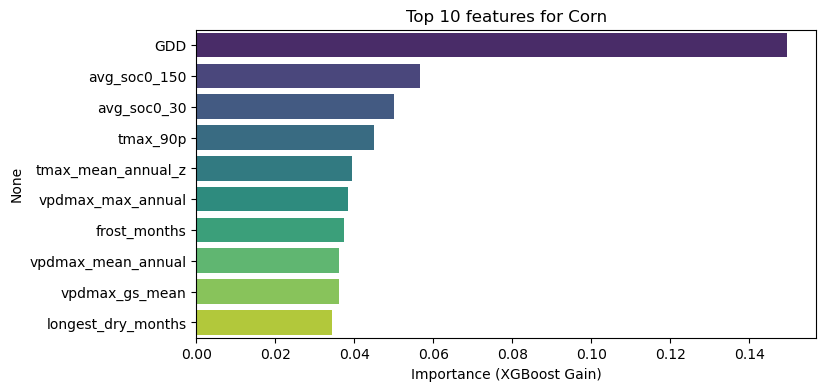

/tmp/ipykernel_10680/3234143875.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fi.values, y=fi.index, palette="viridis")


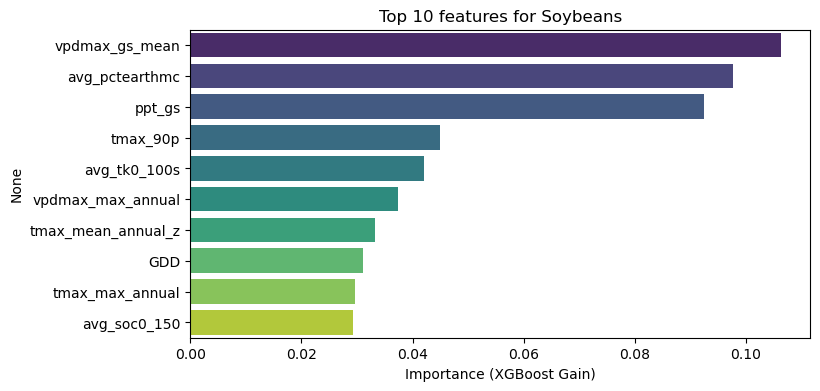

/tmp/ipykernel_10680/3234143875.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fi.values, y=fi.index, palette="viridis")


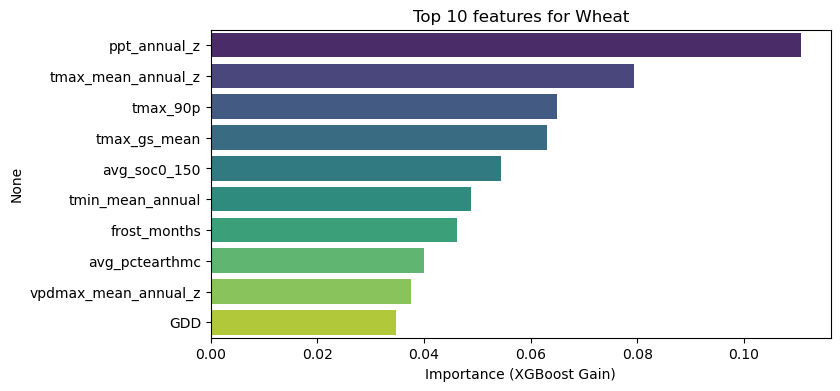

/tmp/ipykernel_10680/3234143875.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fi.values, y=fi.index, palette="viridis")


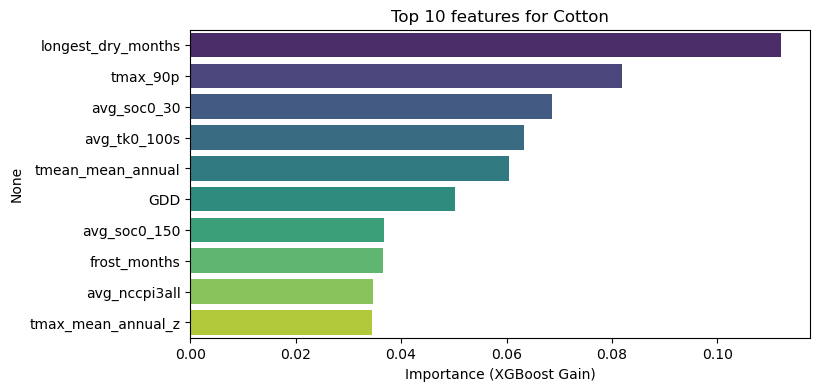

/tmp/ipykernel_10680/3234143875.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fi.values, y=fi.index, palette="viridis")


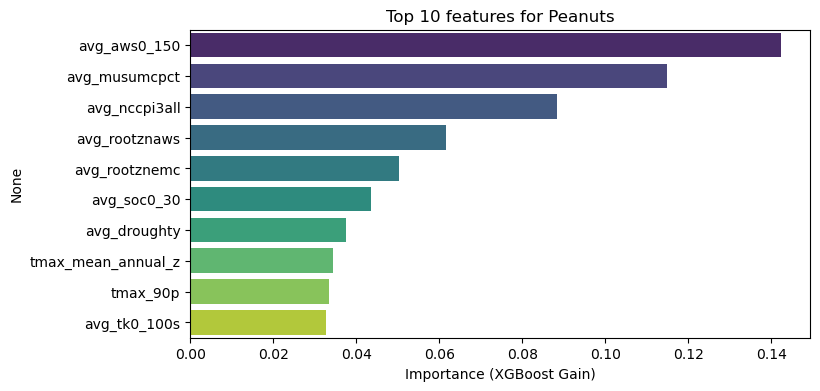

In [34]:
def plot_feature_importances(model, features, commodity, top_n=10):
    imp = model.feature_importances_
    fi = pd.Series(imp, index=features).sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(8,4))
    sns.barplot(x=fi.values, y=fi.index, palette="viridis")
    plt.title(f"Top {top_n} features for {commodity}")
    plt.xlabel("Importance (XGBoost Gain)")
    plt.show()

# example: plot for corn
plot_feature_importances(commodity_models['CORN'], features, 'Corn')
plot_feature_importances(commodity_models['SOYBEANS'], features, 'Soybeans')
plot_feature_importances(commodity_models['WHEAT'], features, 'Wheat')
plot_feature_importances(commodity_models['COTTON'], features, 'Cotton')
plot_feature_importances(commodity_models['PEANUTS'], features, 'Peanuts')

## TESTING

In [3]:
monthly = pd.read_csv("Monthly Climate Data 2023-2024.csv", skiprows=10)

In [5]:
monthly.rename(columns={"Name":"County", "Elevation (ft)":"Elevation", "ppt (inches)":"ppt", "tmin (degrees F)":"tmin", "tmean (degrees F)":"tmean", 
                           "tmax (degrees F)":"tmax", "tdmean (degrees F)":"tdmean", "vpdmin (hPa)":"vpdmin", "vpdmax (hPa)":"vpdmax"}, inplace=True)

In [6]:
monthly['Date_dt'] = pd.to_datetime(monthly['Date'], format='%Y-%m', errors='coerce')
monthly['year'] = monthly['Date_dt'].dt.year
monthly['month'] = monthly['Date_dt'].dt.month

In [7]:
monthly2023 = monthly[monthly['year'] == 2023].copy()
monthly2024 = monthly[monthly['year'] == 2024].copy()

In [8]:
monthly2023.to_csv("test/test2023.csv")
monthly2024.to_csv("test/test2024.csv")

In [35]:
# prepare test climate data (aggregate to county-year) using same aggregation logic as training
test_path_2023 = "test/test2023.csv"
test_path_2024 = "test/test2024.csv"
if os.path.exists(test_path_2023 and test_path_2024):
    test_clim_2023 = pd.read_csv(test_path_2023)
    test_clim_2024 = pd.read_csv(test_path_2024)
else
    test_clim_2023 = monthly2023
    test_clim_2024 = monthly2024

# aggregate per county-year (same measures as training pipeline)
def agg_clim_group(g):
    ppt_sum = g['ppt'].sum()
    ppt_mean = g['ppt'].mean()
    ppt_std = g['ppt'].std()
    tmax_mean = g['tmax'].mean()
    tmax_max = g['tmax'].max()
    tmin_mean = g['tmin'].mean()
    tmean_mean = g['tmean'].mean()
    vpdmax_mean = g['vpdmax'].mean()
    vpdmax_max = g['vpdmax'].max()
    heat_months = (g['tmax'] >= 95.0).sum()
    frost_months = (g['tmin'] <= 32.0).sum()
    longest_wet = longest_consec_true((g['ppt'] >= 15.0).values)
    longest_dry = longest_consec_true((g['ppt'] <= 2.0).values)
    tmax_90 = g['tmax'].quantile(0.90)
    gs = g[(g['month'] >=4) & (g['month'] <=9)]
    ppt_gs = gs['ppt'].sum() if len(gs)>0 else np.nan
    tmax_gs_mean = gs['tmax'].mean() if len(gs)>0 else np.nan
    vpdmax_gs = gs['vpdmax'].mean() if len(gs)>0 else np.nan
    return pd.Series({
        'ppt_annual': ppt_sum,
        'ppt_mean': ppt_mean,
        'ppt_std': ppt_std,
        'ppt_10p': g['ppt'].quantile(0.10),
        'ppt_90p': g['ppt'].quantile(0.90),
        'tmax_mean_annual': tmax_mean,
        'tmax_max_annual': tmax_max,
        'tmin_mean_annual': tmin_mean,
        'tmean_mean_annual': tmean_mean,
        'vpdmax_mean_annual': vpdmax_mean,
        'vpdmax_max_annual': vpdmax_max,
        'heat_months': int(heat_months),
        'frost_months': int(frost_months),
        'longest_wet_months': int(longest_wet),
        'longest_dry_months': int(longest_dry),
        'tmax_90p': tmax_90,
        'ppt_gs': ppt_gs,
        'tmax_gs_mean': tmax_gs_mean,
        'vpdmax_gs_mean': vpdmax_gs
    })

test_agg_2023 = test_clim_2023.groupby(['County','year']).apply(agg_clim_group).reset_index()
test_agg_2024 = test_clim_2024.groupby(['County','year']).apply(agg_clim_group).reset_index()
print("test_agg_2023 rows:", test_agg_2023.shape[0])
print("test_agg_2024 rows:", test_agg_2024.shape[0])

/tmp/ipykernel_10680/2930818443.py:50: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_agg_2023 = test_clim_2023.groupby(['County','year']).apply(agg_clim_group).reset_index()


test_agg_2023 rows: 100
test_agg_2024 rows: 100


/tmp/ipykernel_10680/2930818443.py:51: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_agg_2024 = test_clim_2024.groupby(['County','year']).apply(agg_clim_group).reset_index()


In [36]:
# After building test_agg

def compute_anomalies(df):
    # Merge the climate stats into the input DataFrame
    merged_df = df.merge(clim_stats, on='County', how='left')

    # Compute anomalies for each climate variable
    merged_df['ppt_annual_z'] = (merged_df['ppt_annual'] - merged_df['ppt_annual_clim_mean']) / merged_df['ppt_annual_clim_std']
    merged_df['tmax_mean_annual_z'] = (merged_df['tmax_mean_annual'] - merged_df['tmax_mean_annual_clim_mean']) / merged_df['tmax_mean_annual_clim_std']
    merged_df['vpdmax_mean_annual_z'] = (merged_df['vpdmax_mean_annual'] - merged_df['vpdmax_mean_annual_clim_mean']) / merged_df['vpdmax_mean_annual_clim_std']
    
    return merged_df

test_agg_2023 = compute_anomalies(test_agg_2023)
test_agg_2024 = compute_anomalies(test_agg_2024)

In [37]:
# attach commodity list (we need to predict for each commodity)
# We will predict for all commodities seen in training; for each (county,year,commodity) predict
commodities = master_train['Commodity'].dropna().unique().tolist()

# Expand test_agg to county-year-commodity combinations
def expand_rows_with_commodities(df):
    expanded_rows = []
    for _, row in df.iterrows():
        for c in commodities:
            r = row.to_dict()
            r['Commodity'] = c
            expanded_rows.append(r)
    return pd.DataFrame(expanded_rows)

test_df_2023 = expand_rows_with_commodities(test_agg_2023)
test_df_2024 = expand_rows_with_commodities(test_agg_2024)

print("Test expanded rows for 2023:", test_df_2023.shape[0])
print("Test expanded rows for 2024:", test_df_2024.shape[0])
test_df_2024

Test expanded rows for 2023: 500
Test expanded rows for 2024: 500


,County,year,ppt_annual,ppt_mean,ppt_std,ppt_10p,ppt_90p,tmax_mean_annual,tmax_max_annual,tmin_mean_annual,...,ppt_annual_clim_mean,tmax_mean_annual_clim_mean,vpdmax_mean_annual_clim_mean,ppt_annual_clim_std,tmax_mean_annual_clim_std,vpdmax_mean_annual_clim_std,ppt_annual_z,tmax_mean_annual_z,vpdmax_mean_annual_z,Commodity
0,ALAMANCE,2024,57.36,4.780000,3.804371,1.082,10.523,71.658333,88.4,49.783333,...,45.955116,70.946318,16.147636,8.042799,1.170962,1.193919,1.418024,0.608060,-1.060348,CORN
1,ALAMANCE,2024,57.36,4.780000,3.804371,1.082,10.523,71.658333,88.4,49.783333,...,45.955116,70.946318,16.147636,8.042799,1.170962,1.193919,1.418024,0.608060,-1.060348,SOYBEANS
2,ALAMANCE,2024,57.36,4.780000,3.804371,1.082,10.523,71.658333,88.4,49.783333,...,45.955116,70.946318,16.147636,8.042799,1.170962,1.193919,1.418024,0.608060,-1.060348,WHEAT
3,ALAMANCE,2024,57.36,4.780000,3.804371,1.082,10.523,71.658333,88.4,49.783333,...,45.955116,70.946318,16.147636,8.042799,1.170962,1.193919,1.418024,0.608060,-1.060348,COTTON
4,ALAMANCE,2024,57.36,4.780000,3.804371,1.082,10.523,71.658333,88.4,49.783333,...,45.955116,70.946318,16.147636,8.042799,1.170962,1.193919,1.418024,0.608060,-1.060348,PEANUTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,YANCEY,2024,58.96,4.913333,4.659068,1.703,8.503,66.100000,82.1,44.916667,...,47.203953,63.839535,11.198624,7.926081,1.122201,0.949105,1.483211,2.014314,0.414119,CORN
496,YANCEY,2024,58.96,4.913333,4.659068,1.703,8.503,66.100000,82.1,44.916667,...,47.203953,63.839535,11.198624,7.926081,1.122201,0.949105,1.483211,2.014314,0.414119,SOYBEANS
497,YANCEY,2024,58.96,4.913333,4.659068,1.703,8.503,66.100000,82.1,44.916667,...,47.203953,63.839535,11.198624,7.926081,1.122201,0.949105,1.483211,2.014314,0.414119,WHEAT
498,YANCEY,2024,58.96,4.913333,4.659068,1.703,8.503,66.100000,82.1,44.916667,...,47.203953,63.839535,11.198624,7.926081,1.122201,0.949105,1.483211,2.014314,0.414119,COTTON


In [38]:
soil_gdd = pd.read_csv('data/soil_gdd.csv')
soil_gdd.rename(columns={'Year': 'year'}, inplace=True)

soil_gdd_2023 = soil_gdd[soil_gdd['year'] == 2023].copy()
soil_gdd_2024 = soil_gdd[soil_gdd['year'] == 2024].copy()
print(soil_gdd.columns)
print(test_df_2024.columns)

Index(['year', 'County', 'Commodity', 'GDD', 'avg_aws0_150', 'avg_aws0_100',
       'avg_soc0_30', 'avg_soc0_150', 'avg_rootznaws', 'avg_rootznemc',
       'avg_tk0_30a', 'avg_tk0_100a', 'avg_tk0_30s', 'avg_tk0_100s',
       'avg_pctearthmc', 'avg_musumcpct', 'avg_droughty', 'avg_nccpi3all'],
      dtype='object')
Index(['County', 'year', 'ppt_annual', 'ppt_mean', 'ppt_std', 'ppt_10p',
       'ppt_90p', 'tmax_mean_annual', 'tmax_max_annual', 'tmin_mean_annual',
       'tmean_mean_annual', 'vpdmax_mean_annual', 'vpdmax_max_annual',
       'heat_months', 'frost_months', 'longest_wet_months',
       'longest_dry_months', 'tmax_90p', 'ppt_gs', 'tmax_gs_mean',
       'vpdmax_gs_mean', 'ppt_annual_clim_mean', 'tmax_mean_annual_clim_mean',
       'vpdmax_mean_annual_clim_mean', 'ppt_annual_clim_std',
       'tmax_mean_annual_clim_std', 'vpdmax_mean_annual_clim_std',
       'ppt_annual_z', 'tmax_mean_annual_z', 'vpdmax_mean_annual_z',
       'Commodity'],
      dtype='object')


In [39]:
test_df_2023 = pd.merge(test_df_2023, soil_gdd_2023, on=['year', 'County', 'Commodity'])
test_df_2024 = pd.merge(test_df_2024, soil_gdd_2024, on=['year', 'County', 'Commodity'])

In [40]:
test_df_2023.to_csv('test/testAll2023.csv')
test_df_2024.to_csv('test/testAll2024.csv')

In [41]:
# predict per row using per-commodity model or global fallback
# Prepare numeric features and one-hot commodity for global model
def add_predictions(df):
    preds = []
    # Transform the numerical features for the current DataFrame
    X_test_num = imp.transform(df[features])

    for i, row in df.iterrows():
        comm = row['Commodity']
        # If a commodity-specific model exists, use it
        if comm in commodity_models:
            model = commodity_models[comm]
            xnum = X_test_num[i:i+1]
            yhat = model.predict(xnum)[0]
        preds.append(yhat)

    df['pred_yield'] = preds
    return df

test_df_2023 = add_predictions(test_df_2023)
test_df_2024 = add_predictions(test_df_2024)

In [42]:
# aggregate to state-level mean yield per commodity for the test year, and write predictions.csv
def process_and_save_predictions(df_list):
    if not df_list:
        print("DataFrame list is empty. No predictions to process.")
        return

    # Consolidate all DataFrames into a single one
    test_df = pd.concat(df_list, ignore_index=True)
    
    # Group by both Year and Commodity and calculate the mean predicted yield
    agg_by_comm_year = test_df.groupby(['year', 'Commodity'])['pred_yield'].mean().reset_index().rename(columns={'pred_yield': 'YIELD_LBS_PER_ACRE'})
    
    # Reorder columns and sort by Year and then Commodity
    predictions = agg_by_comm_year[['year','Commodity','YIELD_LBS_PER_ACRE']].sort_values(['year', 'Commodity'])

    # Save the consolidated predictions to a CSV file
    predictions.to_csv("test/predictionsState.csv", index=False)
    print("Saved predictions.csv with {} rows for multiple years.".format(len(predictions)))
    
    # Show the consolidated predictions
    print("\nConsolidated State predictions:")
    print(predictions)

# Call the new function with the list of processed DataFrames
process_and_save_predictions([test_df_2023, test_df_2024])

Saved predictions.csv with 10 rows for multiple years.

Consolidated State predictions:
   year Commodity  YIELD_LBS_PER_ACRE
0  2023      CORN        13884.480469
1  2023    COTTON          640.059326
2  2023   PEANUTS         2492.537109
3  2023  SOYBEANS         1828.434570
4  2023     WHEAT         4963.703125
5  2024      CORN        10391.458984
6  2024    COTTON          660.445251
7  2024   PEANUTS         2696.516846
8  2024  SOYBEANS         1918.145630
9  2024     WHEAT         4315.431152


In [43]:
# Save county-level predictions (Year, Commodity, County, YIELD_LBS_PER_ACRE)
def process_and_save_predictions(df_list):
    if not df_list:
        print("DataFrame list is empty. No predictions to process.")
        return

    # Consolidate all DataFrames into a single one
    test_df = pd.concat(df_list, ignore_index=True)

    # Ensure correct column names
    test_df = test_df.rename(columns={'year':'Year', 'pred_yield':'YIELD_LBS_PER_ACRE'})

    # Keep the required columns
    predictions = test_df[['Year','Commodity','County','YIELD_LBS_PER_ACRE']].copy()

    # Sort for readability
    predictions = predictions.sort_values(['Year','Commodity','County'])

    # Save to CSV
    predictions.to_csv("test/predictions.csv", index=False)
    print(f"Saved predictions.csv with {len(predictions)} county-level rows.")

    return predictions

predictions = process_and_save_predictions([test_df_2023, test_df_2024])
predictions.head()

Saved predictions.csv with 1000 county-level rows.


,Year,Commodity,County,YIELD_LBS_PER_ACRE
0,2023,CORN,ALAMANCE,16660.134766
5,2023,CORN,ALEXANDER,16733.982422
10,2023,CORN,ALLEGHANY,24073.242188
15,2023,CORN,ANSON,10413.839844
20,2023,CORN,ASHE,20229.785156
